**Executed:** Mon Mar 27 11:43:18 2017

**Duration:** 26 seconds.

# 8-pixel DCR

> *This notebook computes the detectors DCR for the two 8-pixel arrays used for the 8-spot smFRET measurements*

## Load software

In [1]:
import phconvert as phc
phc.__version__

'0.7.2'

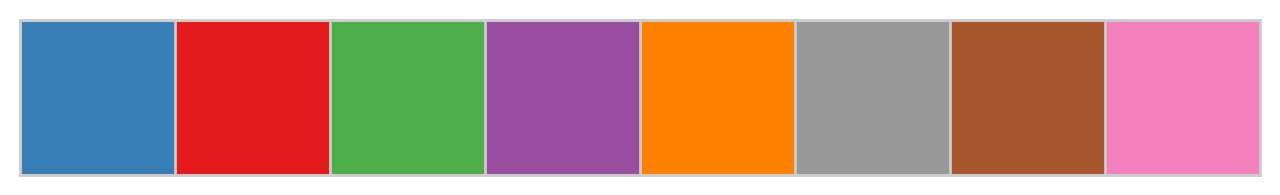

In [2]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

sns.set_style('whitegrid')
#sns.set_palette('deep')

# palette = ('Paired', 10)
# sns.palplot(sns.color_palette(*palette))
# sns.set_palette(*palette)

bmap = sns.color_palette("Set1", 9)
colors = np.array(bmap)[(1,0,2,3,4,8,6,7), :]
sns.palplot(sns.color_palette(colors))
sns.set_palette(colors)

## Load data

In [3]:
data_dir = './data/multispot/'

In [4]:
fname = 'Z2014-02-26_DCR_test_2.hdf5'

In [5]:
full_fname = data_dir + fname

In [6]:
d = phc.hdf5.load_photon_hdf5(full_fname, require_setup=False)

In [7]:
type(d._v_file)

tables.file.File

## Simple DCR estimation

In [8]:
# Compute DCR
A_em = phc.hdf5.photon_data_mapping(d._v_file, 'detectors')

In [9]:
A_em = [a.read().view(bool) for a in A_em.values()]
accept_dcr = [a.sum()/d.acquisition_duration.read() for a in A_em]
donor_dcr = [(~a).sum()/d.acquisition_duration.read() for a in A_em]

# Make a DataFrame
dcr_data = pd.DataFrame(columns = ['Donor DCR', 'Acceptor DCR'], dtype=float)
dcr_data.index.name = 'CH'
dcr_data['Donor DCR'] = donor_dcr
dcr_data['Acceptor DCR'] = accept_dcr
dcr_data = dcr_data.round(1)
dcr_data

,Donor DCR,Acceptor DCR
0,36.4,3678.9
1,116.6,7203.5
2,3774.9,78.2
3,567.0,901.4
4,29.2,1716.5
5,442.6,4320.6
6,27.1,48.7
7,24.4,53.4


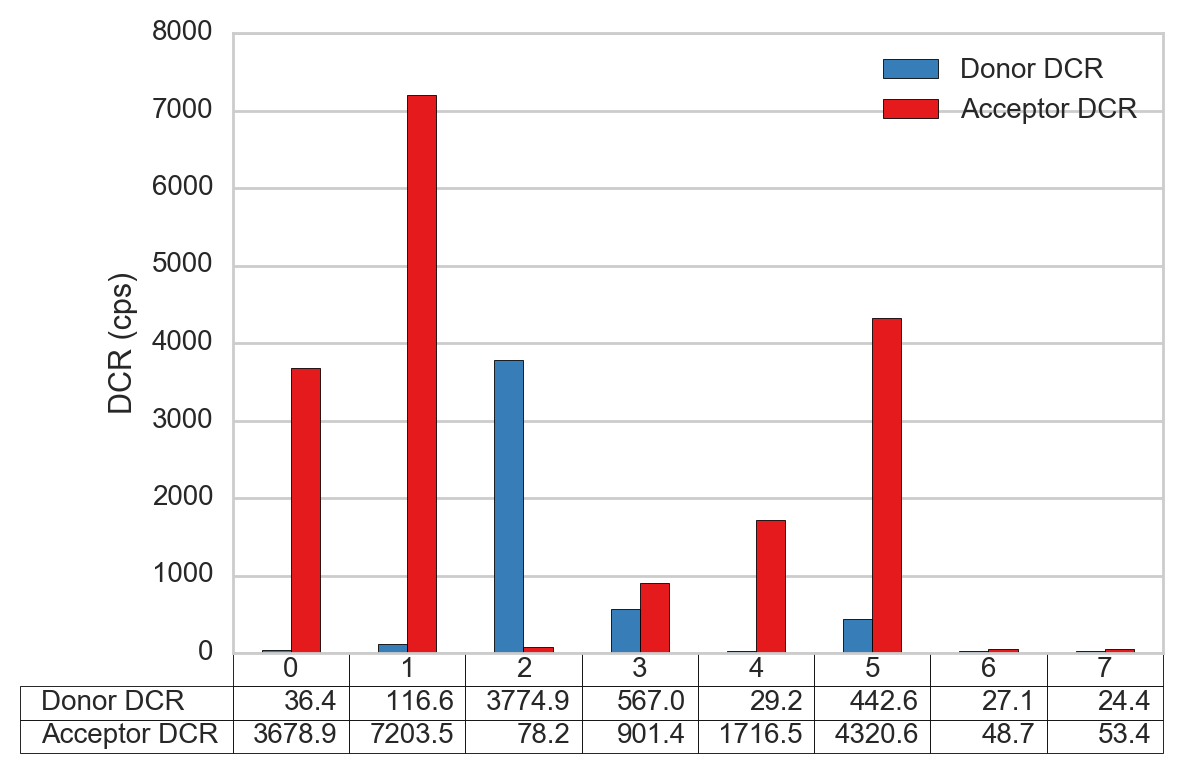

In [10]:
# Output plot and tables
dcr_data.plot.bar(table=np.round(dcr_data, 2).T)
plt.ylabel('DCR (cps)')
plt.gca().xaxis.set_visible(False)

## Compute DCR via fitting

In [11]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.9).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [12]:
def compute_dcr(d):
    # Compute DCR
    accept_dcr = [a.sum()/(d.time_max - d.time_min) for a in d.A_em]
    donor_dcr = [(~a).sum()/(d.time_max - d.time_min) for a in d.A_em]

    # Make a DataFrame
    dcr_data = pd.DataFrame(columns = ['Donor DCR', 'Acceptor DCR'], dtype=float)
    dcr_data['Donor DCR'] = donor_dcr
    dcr_data['Acceptor DCR'] = accept_dcr
    dcr_data.index.name = 'CH'
    return dcr_data

In [13]:
d = loader.photon_hdf5(full_fname)

In [14]:
d_small = d.slice_ph(time_s2=30)

In [15]:
dcr_small = compute_dcr(d_small).round(1)
dcr_small

,Donor DCR,Acceptor DCR
CH,,
0,36.2,3734.4
1,116.0,7282.7
2,3774.9,144.3
3,571.1,971.8
4,29.0,1775.1
5,447.5,4375.6
6,28.0,120.6
7,23.8,126.4


In [16]:
print('Percentage DCR change:')
100*(dcr_small - dcr_data)/dcr_data

Percentage DCR change:


,Donor DCR,Acceptor DCR
CH,,
0,-0.549451,1.508603
1,-0.514580,1.099466
2,0.000000,84.526854
3,0.723104,7.810073
4,-0.684932,3.413924
5,1.107094,1.272971
6,3.321033,147.638604
7,-2.459016,136.704120


In [17]:
print('Percentage DCR change:')
100*(dcr_small - dcr_data)/dcr_data

Percentage DCR change:


,Donor DCR,Acceptor DCR
CH,,
0,-0.549451,1.508603
1,-0.514580,1.099466
2,0.000000,84.526854
3,0.723104,7.810073
4,-0.684932,3.413924
5,1.107094,1.272971
6,3.321033,147.638604
7,-2.459016,136.704120


In [18]:
#d.calc_bg(fun=fb.bg.raw_fit, time_s=30)

In [19]:
#%matplotlib qt

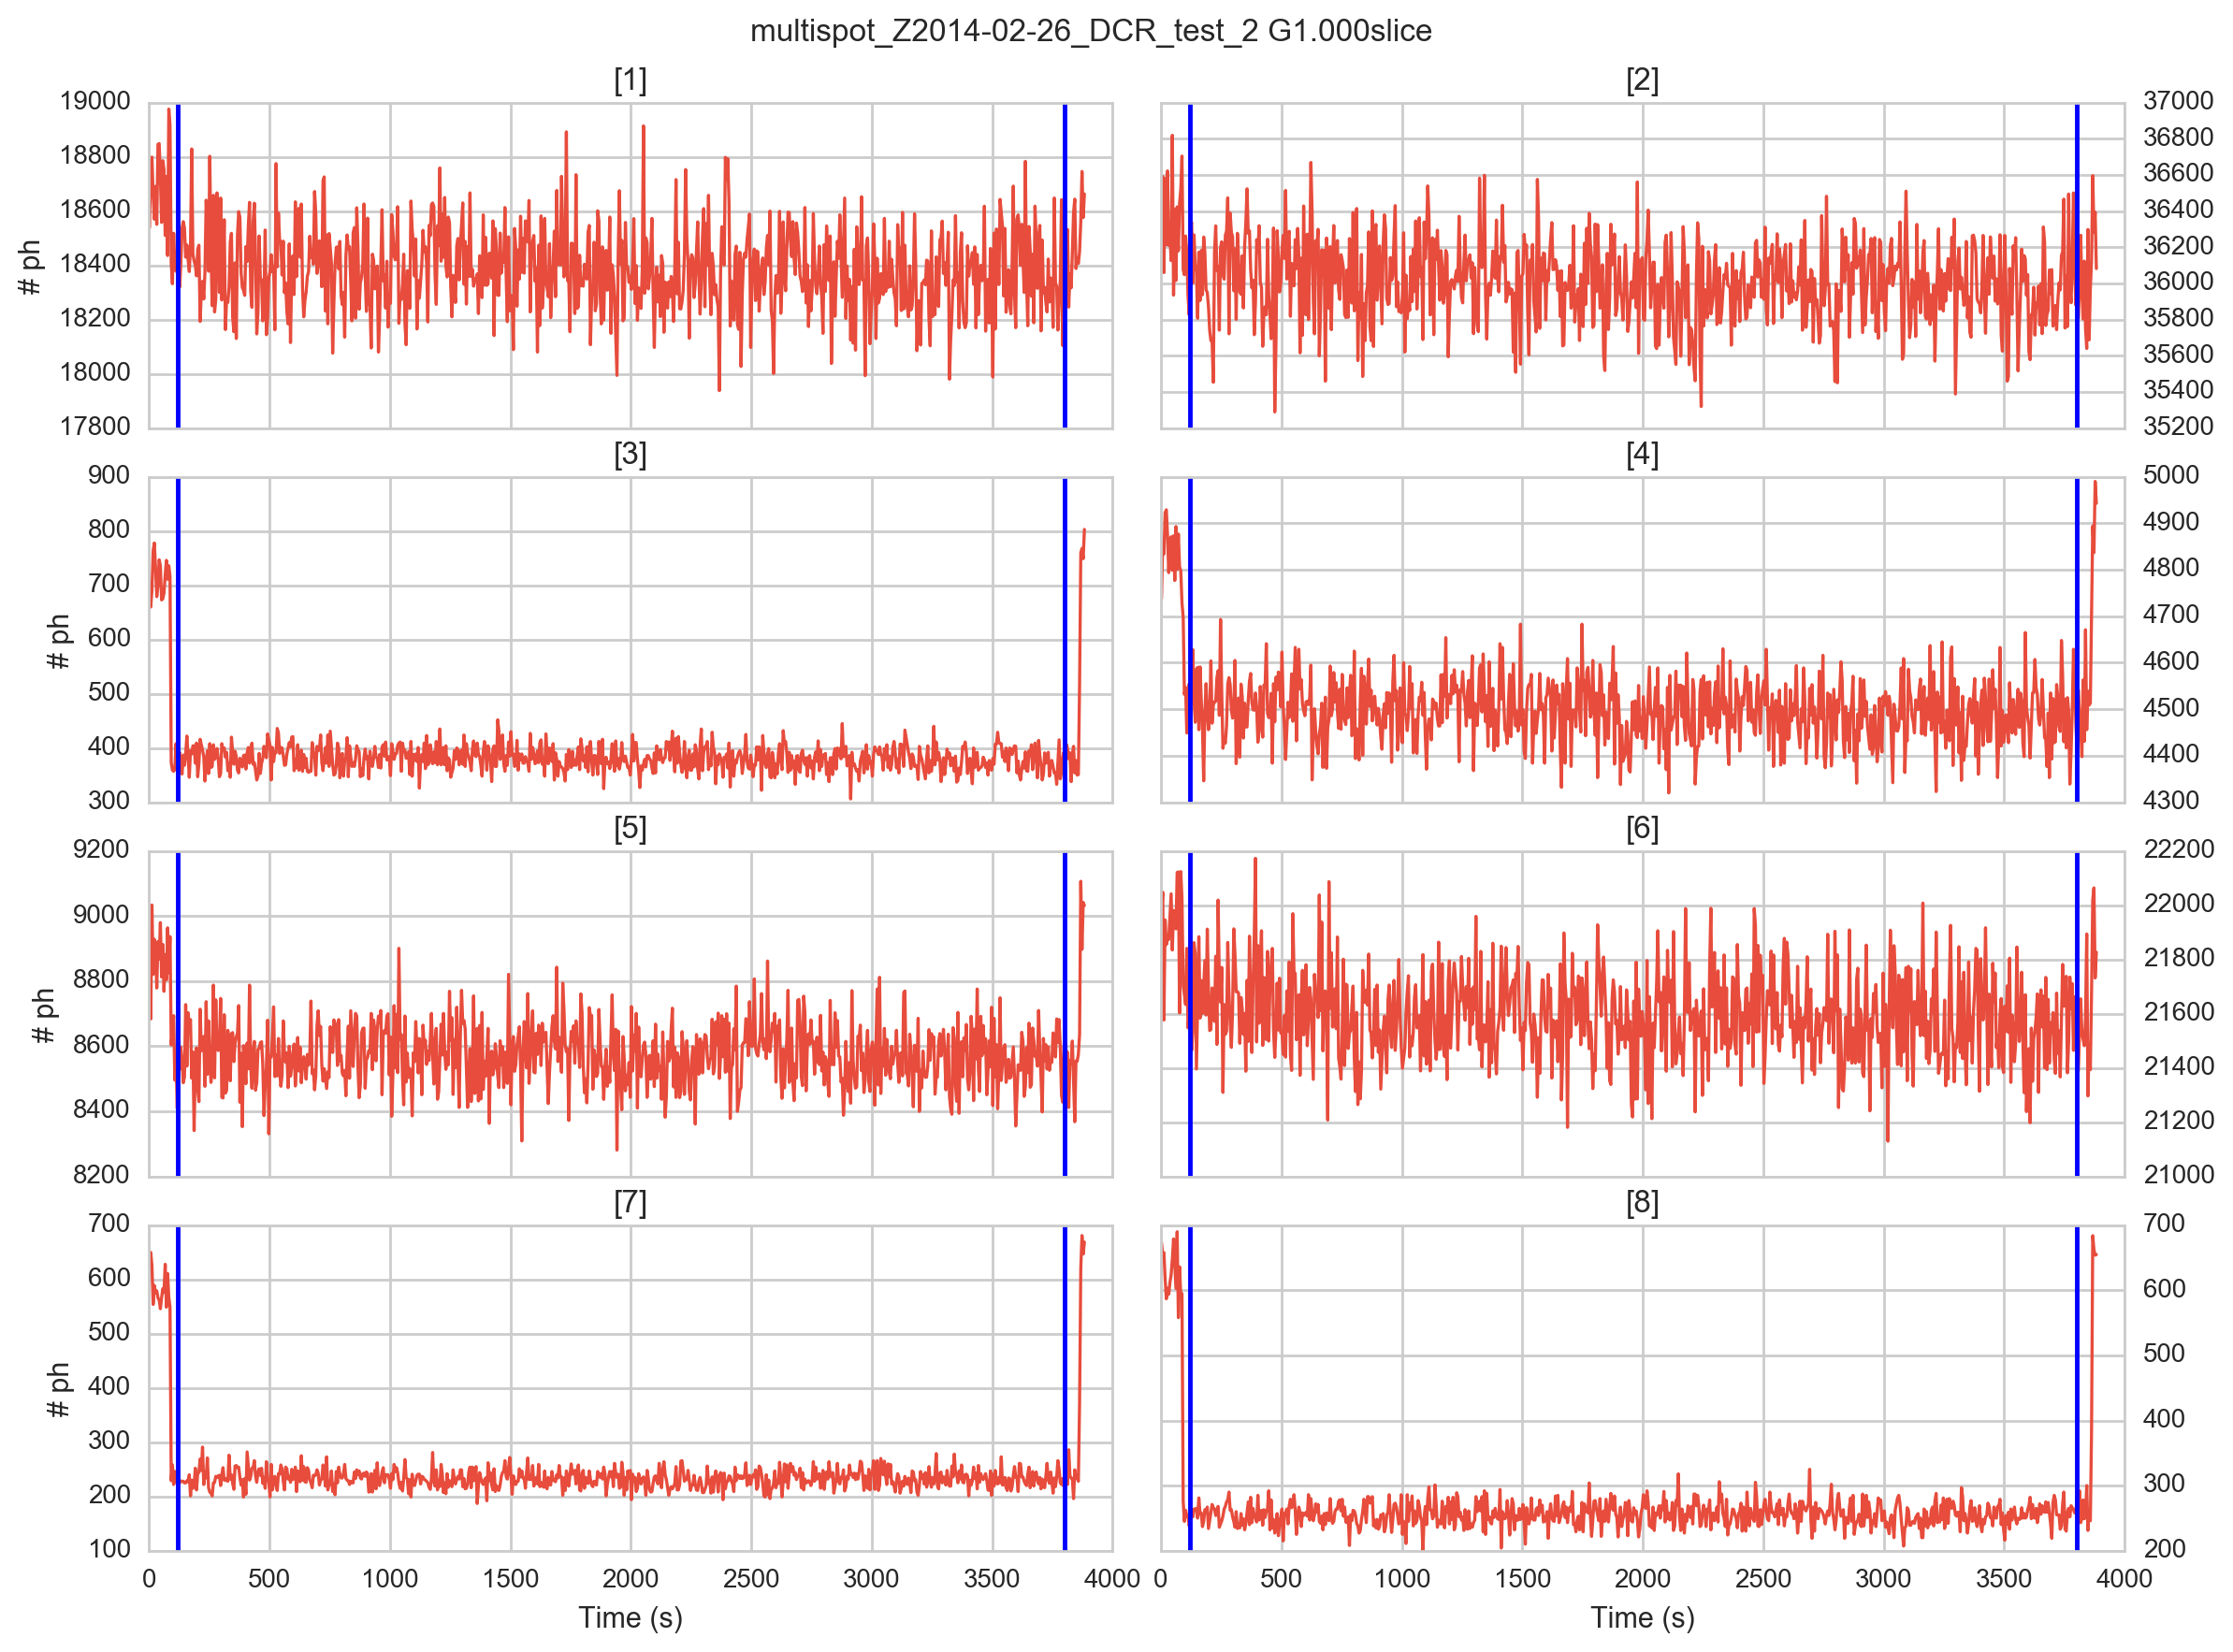

In [20]:
Ax = dplot(d, timetrace_single, ph_sel=Ph_sel(Dex='Aem'), binwidth=5, 
           tmax=None, show_rate_th=False, sharey=False, set_ax_limits=False)
for ax in Ax.ravel():
    ax.axvline(120)
    ax.axvline(3800)

In [21]:
d_sel = d.slice_ph(time_s1=120, time_s2=3800)
dcr_sel = compute_dcr(d_sel).round(1)
dcr_sel

,Donor DCR,Acceptor DCR
CH,,
0,36.4,3676.6
1,116.5,7201.0
2,3774.3,76.2
3,567.0,899.1
4,29.3,1714.6
5,442.5,4318.3
6,27.1,46.6
7,24.4,51.2


In [22]:
dcr_sel - dcr_data

,Donor DCR,Acceptor DCR
CH,,
0,0.0,-2.3
1,-0.1,-2.5
2,-0.6,-2.0
3,0.0,-2.3
4,0.1,-1.9
5,-0.1,-2.3
6,0.0,-2.1
7,0.0,-2.2


In [23]:
d_sel.calc_bg(bg.exp_fit, time_s=30, tail_min_us='auto')

 - Calculating BG rates ... 

[DONE]


In [24]:
raw_bg_rates_d = np.asfarray(d_sel.bg_dd).mean(1)
raw_bg_rates_a = np.asfarray(d_sel.bg_ad).mean(1)

dcr_sel['Donor DCR tail fit'] = raw_bg_rates_d.round(1)
dcr_sel['Acceptor DCR tail fit'] = raw_bg_rates_a.round(1)

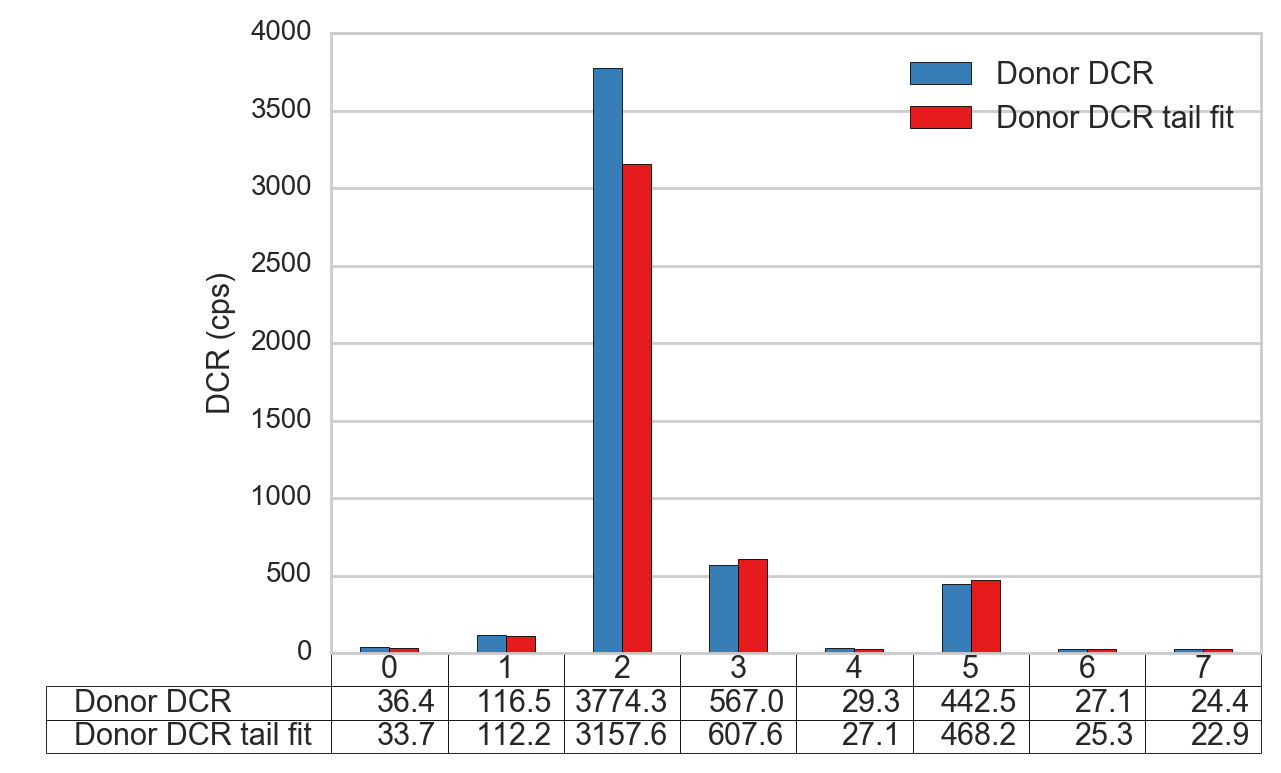

In [25]:
dcr_sel_d = dcr_sel[['Donor DCR', 'Donor DCR tail fit']]
dcr_sel_d.plot.bar(table=np.round(dcr_sel_d, 2).T)
plt.ylabel('DCR (cps)')
plt.gca().xaxis.set_visible(False)

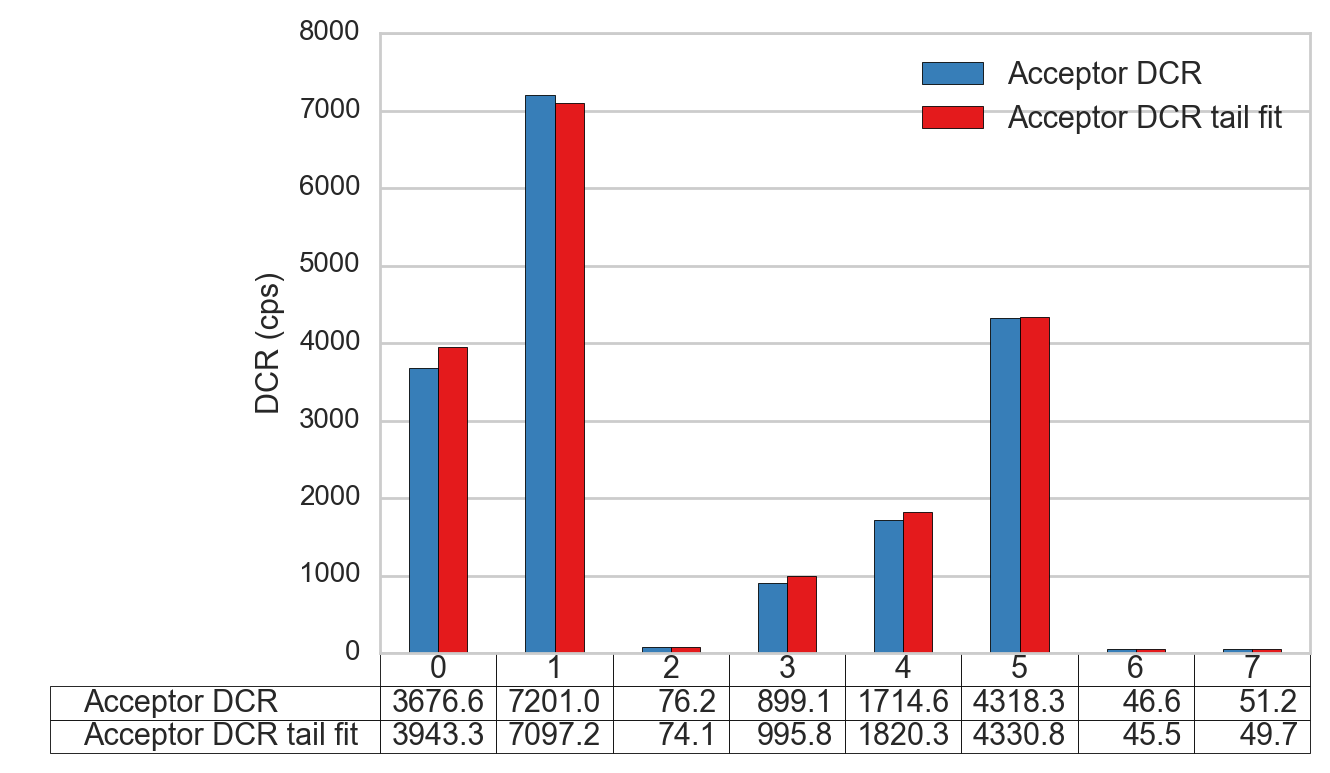

In [26]:
dcr_sel_a = dcr_sel[['Acceptor DCR', 'Acceptor DCR tail fit']]
dcr_sel_a.plot.bar(table=np.round(dcr_sel_a, 2).T)
plt.ylabel('DCR (cps)')
plt.gca().xaxis.set_visible(False)

In [27]:
dcr_sel

,Donor DCR,Acceptor DCR,Donor DCR tail fit,Acceptor DCR tail fit
CH,,,,
0,36.4,3676.6,33.7,3943.3
1,116.5,7201.0,112.2,7097.2
2,3774.3,76.2,3157.6,74.1
3,567.0,899.1,607.6,995.8
4,29.3,1714.6,27.1,1820.3
5,442.5,4318.3,468.2,4330.8
6,27.1,46.6,25.3,45.5
7,24.4,51.2,22.9,49.7


In [28]:
dcr_fit = dcr_sel[['Donor DCR tail fit', 'Acceptor DCR tail fit']]
dcr_fit.columns = ['Donor DCR', 'Acceptor DCR']
dcr_fit

,Donor DCR,Acceptor DCR
CH,,
0,33.7,3943.3
1,112.2,7097.2
2,3157.6,74.1
3,607.6,995.8
4,27.1,1820.3
5,468.2,4330.8
6,25.3,45.5
7,22.9,49.7


## Save results

In [29]:
dcr_data.to_csv('results/8-pixels_DCR.csv')

In [30]:
pd.read_csv('results/8-pixels_DCR.csv', index_col=0)

,Donor DCR,Acceptor DCR
0,36.4,3678.9
1,116.6,7203.5
2,3774.9,78.2
3,567.0,901.4
4,29.2,1716.5
5,442.6,4320.6
6,27.1,48.7
7,24.4,53.4
